In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
#train_images.shape
#test_images.shape

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
# one hot encode target values
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
'''A good starting point is to normalize the pixel values, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers
to floats, then dividing the pixel values by the maximum value.'''
# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
X_train = train_norm / 255.0
X_test = test_norm / 255.0

In [ ]:
'''We will create a single figure with two subplots, one for loss and one for accuracy. The blue lines will indicate model performance on the training dataset and
orange lines will indicate performance on the hold out test dataset. The summarize_diagnostics() function below creates and shows this plot given the collected
 training histories. The plot is saved to file, specifically a file with the same name as the script with a ‘png‘ extension.'''
import matplotlib.pyplot as plt
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# define cnn model
def define_model():
	model = tf.keras.models.Sequential()                   # He weight initialization,
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
model1=define_model()
history = model1.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/15
782/782 [==============================] - 16s 10ms/step - loss: 1.7015 - accuracy: 0.3745 - val_loss: 1.3721 - val_accuracy: 0.4945
Epoch 2/15
782/782 [==============================] - 7s 10ms/step - loss: 1.2567 - accuracy: 0.5507 - val_loss: 1.0953 - val_accuracy: 0.6107
Epoch 3/15
782/782 [==============================] - 9s 11ms/step - loss: 1.0213 - accuracy: 0.6391 - val_loss: 0.9078 - val_accuracy: 0.6785
Epoch 4/15
782/782 [==============================] - 7s 9ms/step - loss: 0.8832 - accuracy: 0.6910 - val_loss: 0.8190 - val_accuracy: 0.7146
Epoch 5/15
782/782 [==============================] - 7s 9ms/step - loss: 0.7915 - accuracy: 0.7231 - val_loss: 0.7278 - val_accuracy: 0.7491
Epoch 6/15
782/782 [==============================] - 7s 9ms/step - loss: 0.7316 - accuracy: 0.7449 - val_loss: 0.7038 - val_accuracy: 0.7540
Epoch 7/15
782/782 [==============================] - 7s 9ms/step - loss: 0.6775 - accuracy: 0.7647 - val_loss: 0.6700 - val_accuracy: 0.7715
Ep

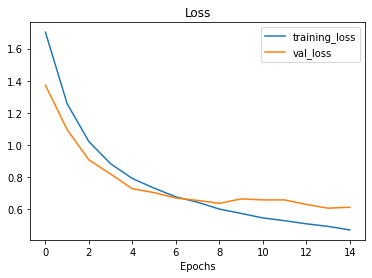

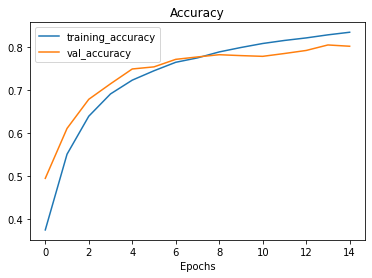

In [ ]:
plot_loss_curves(history)

In [ ]:
''' Dropout can be added to the model by adding new Dropout layers, where the amount of nodes removed is specified as a parameter. There are many patterns for adding Dropout to a model, in terms of where in the model to add the layers and how much dropout to use.

In this case, we will add Dropout layers after each max pooling layer and after the fully connected layer, and use a fixed dropout rate of 20% (e.g. retain 80% of the nodes).'''

''' Dropout in NN: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/ 
'''
# define cnn model
def define_model():
	model = tf.keras.models.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
model2=define_model()

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:

history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
782/782 [==============================] - 9s 10ms/step - loss: 1.6637 - accuracy: 0.3829 - val_loss: 1.2948 - val_accuracy: 0.5368
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.2192 - accuracy: 0.5655 - val_loss: 1.0348 - val_accuracy: 0.6346
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 1.0098 - accuracy: 0.6419 - val_loss: 0.8918 - val_accuracy: 0.6860
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8936 - accuracy: 0.6868 - val_loss: 0.8575 - val_accuracy: 0.6968
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8081 - accuracy: 0.7160 - val_loss: 0.7714 - val_accuracy: 0.7330
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7401 - accuracy: 0.7410 - val_loss: 0.7189 - val_accuracy: 0.7540
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 0.6855 - accuracy: 0.7586 - val_loss: 0.6912 - val_accuracy: 0.7643
Epoch

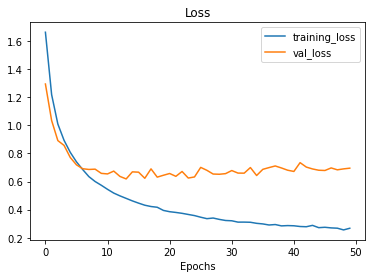

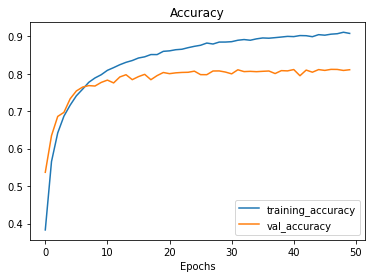

In [ ]:
plot_loss_curves(history)

In [ ]:
# DATA AUG:
from keras.preprocessing.image import ImageDataGenerator
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)

In [ ]:
# fit model
steps = int(X_train.shape[0] / 64)
history = model2.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(X_test, y_test))

In [ ]:
# define cnn model

def define_model():
	model = tf.keras.models.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.3))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.4))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.BatchNormalization())
	model.add(layers.Dropout(0.5))
	model.add(layers.Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
model3=define_model()

In [ ]:
# fit model
steps = int(X_train.shape[0] / 64)
history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


<ipython-input-59-41613ac0c342>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(X_test, y_test))


781/781 [==============================] - 31s 38ms/step - loss: 1.7276 - accuracy: 0.4038 - val_loss: 1.2154 - val_accuracy: 0.5653
Epoch 2/20
781/781 [==============================] - 27s 35ms/step - loss: 1.2450 - accuracy: 0.5537 - val_loss: 1.1432 - val_accuracy: 0.5974
Epoch 3/20
781/781 [==============================] - 29s 36ms/step - loss: 1.0731 - accuracy: 0.6191 - val_loss: 1.1998 - val_accuracy: 0.5961
Epoch 4/20
781/781 [==============================] - 29s 37ms/step - loss: 0.9576 - accuracy: 0.6626 - val_loss: 0.8569 - val_accuracy: 0.7018
Epoch 5/20
781/781 [==============================] - 29s 38ms/step - loss: 0.8774 - accuracy: 0.6947 - val_loss: 0.7500 - val_accuracy: 0.7356
Epoch 6/20
781/781 [==============================] - 30s 38ms/step - loss: 0.8148 - accuracy: 0.7179 - val_loss: 0.7802 - val_accuracy: 0.7315
Epoch 7/20
781/781 [==============================] - 28s 36ms/step - loss: 0.7677 - accuracy: 0.7350 - val_loss: 0.6628 - val_accuracy: 0.7747
Epo

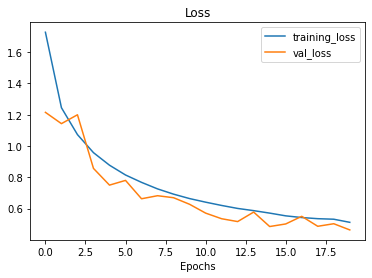

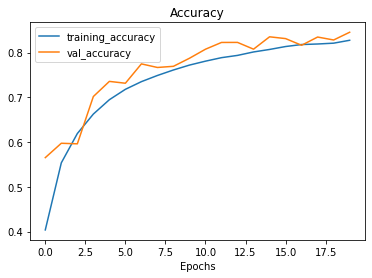

In [ ]:
plot_loss_curves(history)

In [ ]:
# fit model
steps = int(X_train.shape[0] / 64)
history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


<ipython-input-17-845cc35f33e4>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=50, validation_data=(X_test, y_test))


781/781 [==============================] - 29s 36ms/step - loss: 1.7997 - accuracy: 0.3786 - val_loss: 1.4788 - val_accuracy: 0.4807
Epoch 2/50
781/781 [==============================] - 29s 37ms/step - loss: 1.2709 - accuracy: 0.5417 - val_loss: 1.1245 - val_accuracy: 0.6059
Epoch 3/50
781/781 [==============================] - 28s 36ms/step - loss: 1.1028 - accuracy: 0.6086 - val_loss: 0.8600 - val_accuracy: 0.6928
Epoch 4/50
781/781 [==============================] - 28s 36ms/step - loss: 0.9720 - accuracy: 0.6574 - val_loss: 0.8035 - val_accuracy: 0.7158
Epoch 5/50
781/781 [==============================] - 28s 35ms/step - loss: 0.8843 - accuracy: 0.6949 - val_loss: 0.8124 - val_accuracy: 0.7162
Epoch 6/50
781/781 [==============================] - 28s 36ms/step - loss: 0.8133 - accuracy: 0.7168 - val_loss: 0.8406 - val_accuracy: 0.7134
Epoch 7/50
781/781 [==============================] - 28s 36ms/step - loss: 0.7728 - accuracy: 0.7324 - val_loss: 0.6614 - val_accuracy: 0.7734
Epo